## Supervised Learning Final Project: Modelling Insurance Costs

**The problem**: A fictional insurance company, Mass Insurance, needs a way to calculate what they should charge their clients based on client-specific factors (e.g. is the client a smoker?)

**The solution**: We will train and refine a multivariate OLS (ordinary least squares) regression model for this exact purpose, such that Mass Insurance can input determining factors into the model and the model will return the amount that they should charge their new client.

**The data**: Our data is a public dataset that was sourced from Kaggle (see citation below) and downloaded as a CSV. It consists of over a thousand records that represent insured individuals, including what their (presumably annual) insurance charges are and as well as various health factors, such as if the individual is a smoker, their age, etc.

*APA Citation*: Jain, Simran. (2020). Insurance Premium Data. [Data set]. Kaggle. https://www.kaggle.com/datasets/simranjain17/insurance

 *Data breakdown*: 
 
    - Number of records: 1338
    - Number of columns: 7
        - Dependent variable
            - Charges: float
                - The amount that the insured pays for insurance (presumably annual)
        - Independent variables (6)
            - Age: integer
                - The age of the insured
            - Sex: category (male, female)
                - The sex of the insured
            - BMI: integer 
                - The BMI (body mass index) of the insured
            - Children: integer
                - The number of children of the insured
            - Smoker: category (yes, no)
                - Whether the insured is a smoker
            - Region: category (southwest, southeast, northwest, northeast)
                - The region where the insured lives
        

In [85]:
from sklearn.metrics import mean_absolute_error
import pandas as pd
import sklearn.model_selection
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('insurance.csv')

**Data cleaning pt 1**

Our CSV might contain some NA values (as CSVs often do), so we want to drop any rows that contain NaN values as we only want rows with all values included.

In [86]:
# drop NaN rows (CSV has at least one empty row)
data = data.dropna(how='any')

**Data cleaning pt 2**
 
We have some categorical features that need to be encoded properly if they are to be used in our regression model.

The first, and easiest to encode is the feature that describes whether the insured is a smoker.

In [87]:
# convert smoker to binary
smoker_map = {'yes': 1, 'no': 0}
data['smoker'] = data['smoker'].apply(lambda x: smoker_map[x])

**Data cleaning pt 3**

Next, we have a couple of categorical features (`sex` and `region`) which are slightly harder to encode as they are not ordinal categorical variables and
thus cannot be encoded into integers.

However, we can easily one-hot encode both of these features using the pandas `get_dummies` method.


In [88]:
# one-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['sex', 'region'])

**EDA**

Next, we do some preliminary EDA by taking a look at our correlation matrix.

Axes(0.125,0.11;0.62x0.77)


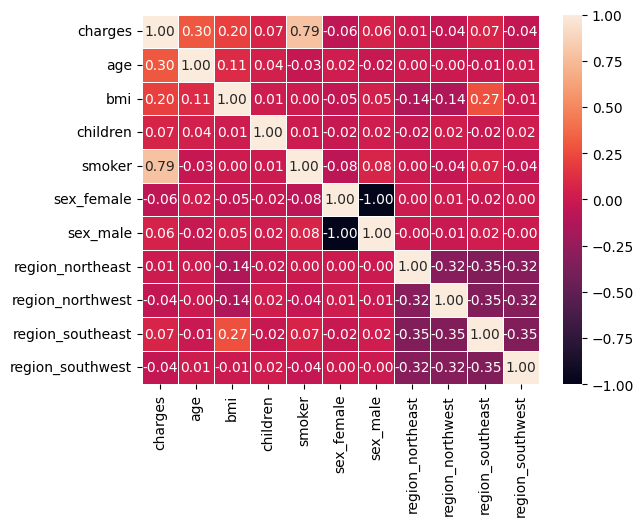

In [91]:
# set dependent variable as first col for correlation matrix to show good results
cols = ['charges'] + [col for col in data if col != 'charges']
data = data[cols]

# print(data.info())

# todo collinearity - no independent variables appear to have have correlation thus no collinearity (based off correlation matrix)
corr = data.corr()

heatmap = sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.5)

print(heatmap)

Next section....

0.602465613355577
0.7321909405495479


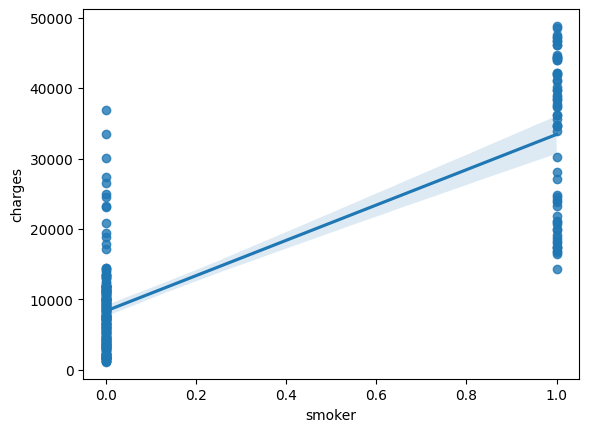

MSE 34553514.794432245
R2 0.7951785889864429
MAE 4217.379790517689
Mean charges: 14334.92113514926


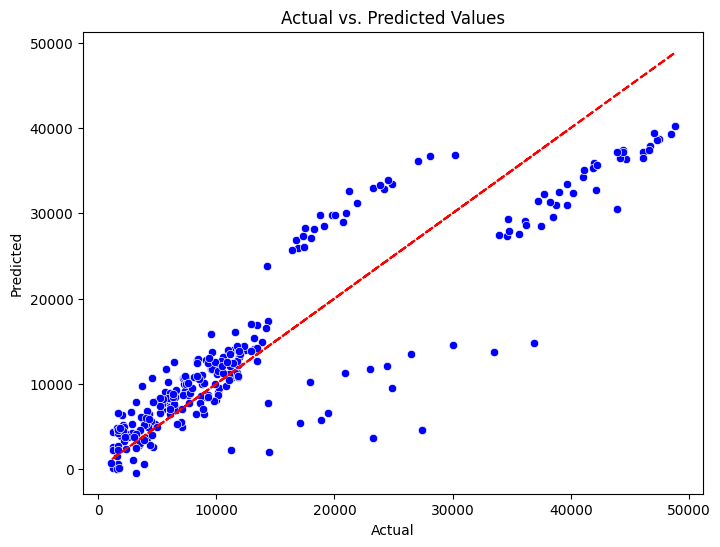

In [84]:

X_train, X_test = sklearn.model_selection.train_test_split(data, test_size=0.2)

# todo interaction terms?
model = smf.ols(formula='charges ~ smoker', data=X_train).fit()
# print(model.summary())
adj_R2 = model.rsquared
print(adj_R2)

multi_model = smf.ols(formula='charges ~ smoker + age + bmi', data=X_train).fit()
multi_r2 = multi_model.rsquared

# todo p-value analysis
# print(multi_model.summary())
print(multi_r2)

# todo need to run the model on the test data and evaluate the results
from sklearn.metrics import mean_squared_error, r2_score

y_pred = multi_model.predict(X_test)
# todo why is mse so high???
y_test = X_test['charges']

sns.regplot(x='smoker', y='charges', data=X_test)
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'MSE {mse}')
print(f'R2 {r2}')
print(f'MAE {mae}')

mean_charges = sum(y_test) / len(y_test)
print(f'Mean charges: {mean_charges}')

# results plot
data = pd.DataFrame({    'Actual': y_test,    'Predicted': y_pred})
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Actual', y='Predicted', data=data, marker='o', color='blue')
plt.plot(data['Actual'], data['Actual'], 'r--')  # Red dashed line for perfect prediction
plt.title('Actual vs. Predicted Values')
plt.show()



